<a href="https://colab.research.google.com/github/bnsreenu/python_for_microscopists/blob/master/368_Part_4_Correlation_Causation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://youtu.be/UWypx4zLzVA

# Correlation Analysis: Understanding Relationships in Data - Part 4
**Part 10 of the Statistical Analysis in Python Tutorial Series**

## Overview

Correlation analysis is one of the most fundamental and widely-used statistical techniques for exploring relationships between variables. This comprehensive tutorial takes you from basic concepts to advanced applications using real-world penguin morphology data.

---


## Dataset: Palmer Penguins

We'll use the famous Palmer Penguins dataset, which provides:
- **344 penguins** across 3 species (Adelie, Chinstrap, Gentoo)
- **Morphological measurements**: bill length/depth, flipper length, body mass
- **Real biological relationships** to explore and interpret
- **Natural confounding factors** (species effects) to understand


---

## Tutorial Structure

**Part 1: Foundation**
- Data exploration and quality assessment
- Visual demonstration of correlation concepts
- Basic Pearson correlation calculations
- Systematic testing of correlation assumptions
- Diagnostic plotting and interpretation
- Spearman correlation as robust alternative

**Part 2: Partial Correlations**  
- Partial correlations controlling for confounding
- Correlation matrices and multiple relationships
- Visualizing correlations

**Part 3: Advanced Correlation Analysis**
- Confidence Intervals
- Statistical Significance

**Part 4: Correlation vs. causation**
- Correlation vs. causation analysis
- Spurious correlation examples

---



# Correlation vs Causation: Understanding the Critical Distinction

## The Most Important Statistical Concept You'll Ever Learn

**"Correlation does not imply causation"** is perhaps the most quoted phrase in statistics, yet it's also one of the most frequently violated principles in data analysis. This notebook explores why this distinction matters and how to think critically about causal relationships.

---

## Why This Matters

Every day, we encounter claims like:
- "Studies show ice cream sales are correlated with crime rates"
- "Taller people earn more money"
- "Social media use is linked to depression"
- "Countries with more storks have higher birth rates"

**The critical question**: Which of these represent genuine causal relationships, and which are misleading correlations?


---

## The Stakes Are High

**In Science**: Misinterpreting correlations as causation leads to:
- Wasted research funding on false leads
- Ineffective medical treatments
- Poor policy decisions

**In Everyday Life**: This confusion leads to:
- Misleading health claims
- Superstitious thinking
- Poor decision-making based on spurious patterns



---

## The Golden Rule

**Remember**: No matter how strong a correlation appears, it never automatically implies causation.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings


# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style consistent with previous tutorials
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


Let us look at three scenarios for spurious relationships:

1. Confounding Variable (Ice Cream ↔ Drowning):
Let us explore a false correlation caused by a third variable (temperature) influencing both.

2. Bidirectional Causation (Exercise ↔ Happiness):
Simulate two variables that influence each other, making interpretation tricky.

3. Coincidental Correlation (Random Walks):
Generate two independent random processes that appear correlated by chance due to similar trends over time.


SPURIOUS CORRELATIONS: WHEN CORRELATION MISLEADS
Ice cream ↔ Drowning: r = 0.909 (confounded by temperature)
Exercise ↔ Happiness: r = 0.793 (bidirectional causation)
Random variables: r = 0.488 (coincidental)


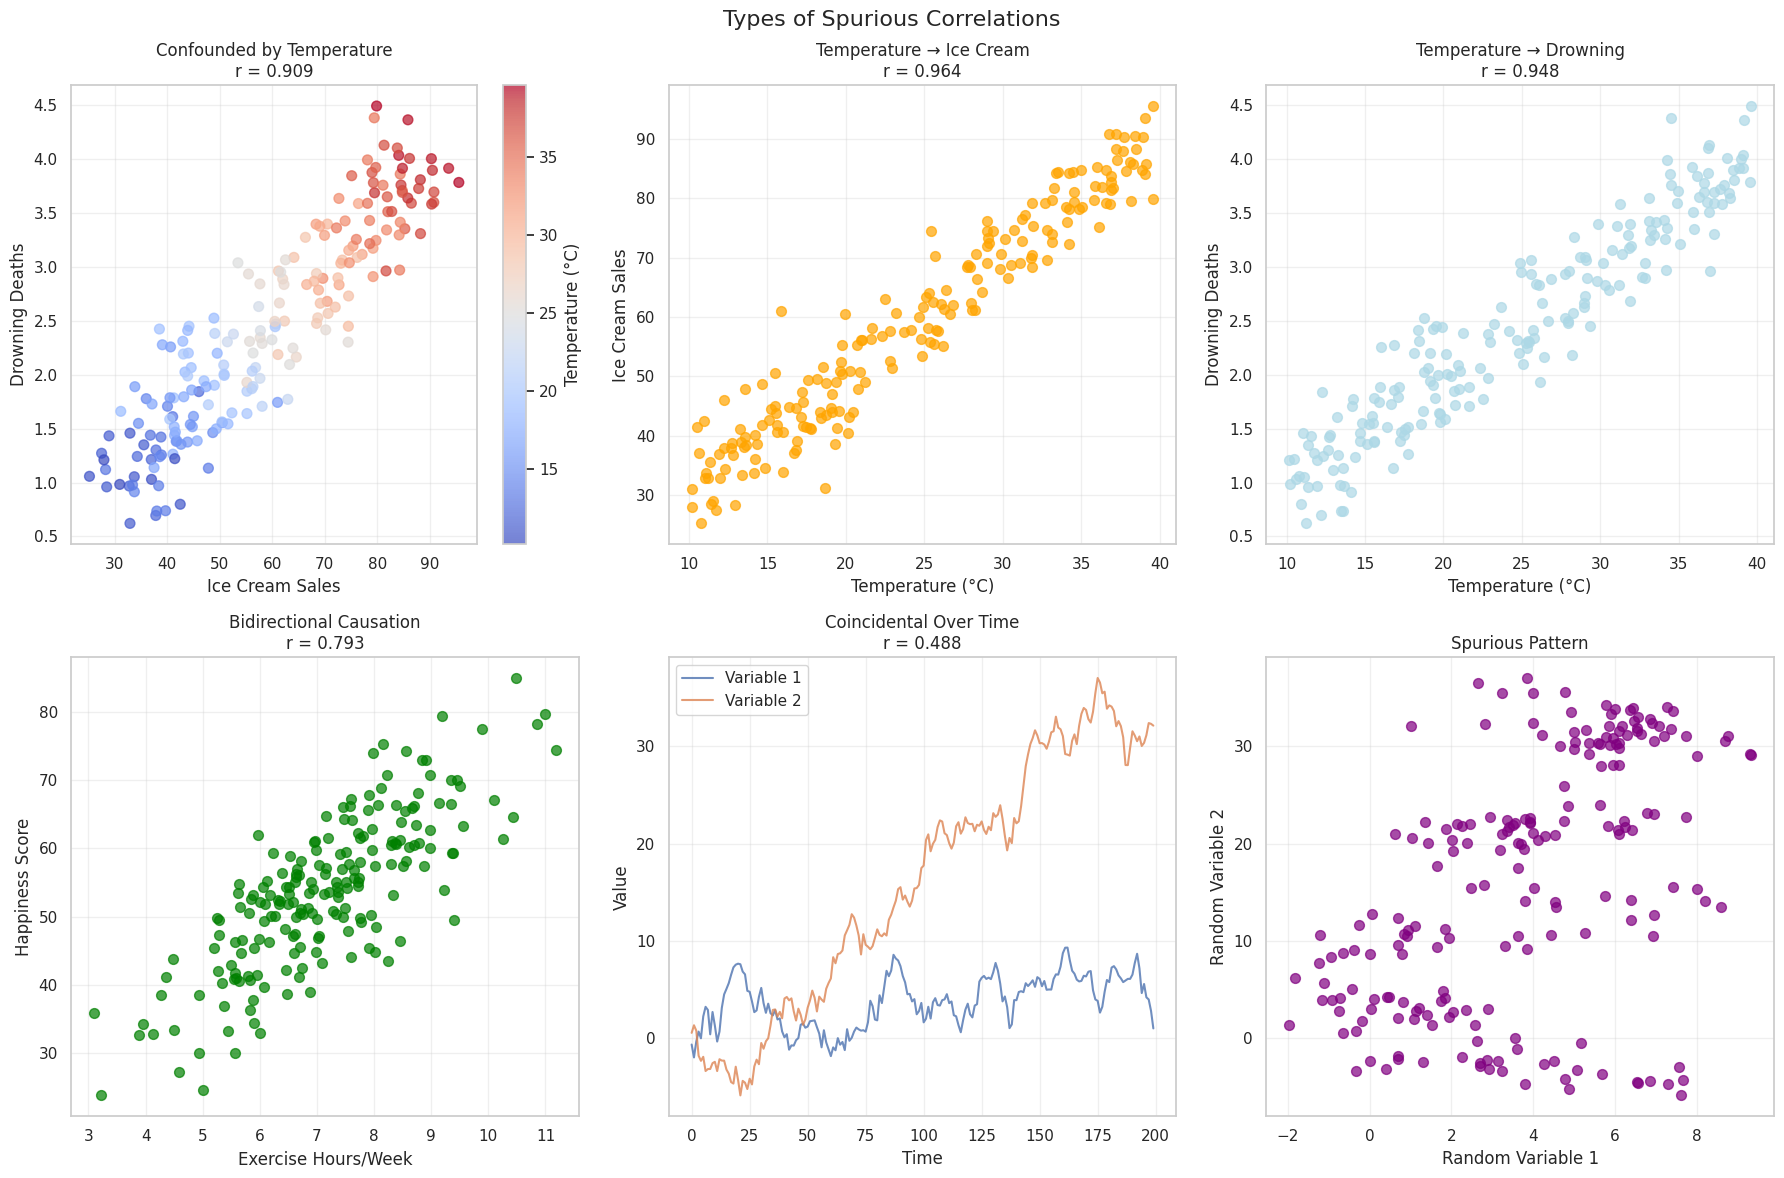

In [ ]:
def demonstrate_spurious_correlations():
    """
    Demonstrate spurious correlations with simulated examples.
    """
    print("\n" + "=" * 60)
    print("SPURIOUS CORRELATIONS: WHEN CORRELATION MISLEADS")
    print("=" * 60)

    np.random.seed(42)
    n = 200

    # Scenario 1: Confounded by third variable (Ice cream & drowning)
    temperature = np.random.uniform(10, 40, n)
    ice_cream_sales = 10 + 2 * temperature + np.random.normal(0, 5, n)
    drowning_deaths = 0.1 * temperature + np.random.normal(0, 0.3, n)
    drowning_deaths = np.maximum(0, drowning_deaths)

    r_ice_drowning, _ = pearsonr(ice_cream_sales, drowning_deaths)
    r_temp_ice, _ = pearsonr(temperature, ice_cream_sales)
    r_temp_drowning, _ = pearsonr(temperature, drowning_deaths)

    # Scenario 2: Bidirectional causation (Exercise & happiness)
    # strong positive correlation between Exercise Hours/Week and Happiness Score.
    # the direction of causation is unclear
    # Does more exercise lead to more happiness? Or are happier people more likely to exercise?
    happiness_baseline = np.random.normal(50, 10, n)
    exercise_hours = 0.1 * happiness_baseline + np.random.normal(2, 1, n)
    exercise_hours = np.maximum(0, exercise_hours)
    happiness_final = happiness_baseline + 0.5 * exercise_hours + np.random.normal(0, 3, n)

    r_exercise_happiness, _ = pearsonr(exercise_hours, happiness_final)

    # Scenario 3: Coincidental correlation (Random walks)
    # Two independent random walks (Variable 1 and Variable 2) appear to track similarly over time,
    # resulting in a moderate correlation (r = 0.488)
    # Despite the visible trend, these variables have no causal connection — the correlation is purely due to random drift.
    random_walk_1 = np.cumsum(np.random.normal(0, 1, n))
    random_walk_2 = np.cumsum(np.random.normal(0.02, 1, n))

    r_coincidental, _ = pearsonr(random_walk_1, random_walk_2)

    # Print key results
    print(f"Ice cream ↔ Drowning: r = {r_ice_drowning:.3f} (confounded by temperature)")
    print(f"Exercise ↔ Happiness: r = {r_exercise_happiness:.3f} (bidirectional causation)")
    print(f"Random variables: r = {r_coincidental:.3f} (coincidental)")

    # Visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Types of Spurious Correlations', fontsize=16)

    # Confounded correlation
    scatter = axes[0, 0].scatter(ice_cream_sales, drowning_deaths, c=temperature,
                               cmap='coolwarm', alpha=0.7, s=50)
    axes[0, 0].set_xlabel('Ice Cream Sales')
    axes[0, 0].set_ylabel('Drowning Deaths')
    axes[0, 0].set_title(f'Confounded by Temperature\nr = {r_ice_drowning:.3f}')
    plt.colorbar(scatter, ax=axes[0, 0], label='Temperature (°C)')

    # True relationships
    axes[0, 1].scatter(temperature, ice_cream_sales, alpha=0.7, s=50, color='orange')
    axes[0, 1].set_xlabel('Temperature (°C)')
    axes[0, 1].set_ylabel('Ice Cream Sales')
    axes[0, 1].set_title(f'Temperature → Ice Cream\nr = {r_temp_ice:.3f}')

    axes[0, 2].scatter(temperature, drowning_deaths, alpha=0.7, s=50, color='lightblue')
    axes[0, 2].set_xlabel('Temperature (°C)')
    axes[0, 2].set_ylabel('Drowning Deaths')
    axes[0, 2].set_title(f'Temperature → Drowning\nr = {r_temp_drowning:.3f}')

    # Bidirectional causation
    axes[1, 0].scatter(exercise_hours, happiness_final, alpha=0.7, s=50, color='green')
    axes[1, 0].set_xlabel('Exercise Hours/Week')
    axes[1, 0].set_ylabel('Happiness Score')
    axes[1, 0].set_title(f'Bidirectional Causation\nr = {r_exercise_happiness:.3f}')

    # Coincidental correlation
    time_points = np.arange(n)
    axes[1, 1].plot(time_points, random_walk_1, label='Variable 1', alpha=0.8)
    axes[1, 1].plot(time_points, random_walk_2, label='Variable 2', alpha=0.8)
    axes[1, 1].set_xlabel('Time')
    axes[1, 1].set_ylabel('Value')
    axes[1, 1].set_title(f'Coincidental Over Time\nr = {r_coincidental:.3f}')
    axes[1, 1].legend()

    axes[1, 2].scatter(random_walk_1, random_walk_2, alpha=0.7, s=50, color='purple')
    axes[1, 2].set_xlabel('Random Variable 1')
    axes[1, 2].set_ylabel('Random Variable 2')
    axes[1, 2].set_title('Spurious Pattern')

    for ax in axes.flat:
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        'confounded': r_ice_drowning,
        'bidirectional': r_exercise_happiness,
        'coincidental': r_coincidental
    }

# Step 1: Demonstrate spurious correlations
spurious_results = demonstrate_spurious_correlations()

#  Establishing Causation: Key Concepts

##  Bradford Hill Criteria (for assessing causality)

These are common guidelines used to evaluate whether a correlation might indicate causation:

1. **Temporal sequence** – The cause must come *before* the effect.
2. **Strength** – Stronger correlations suggest a higher likelihood of causation.
3. **Consistency** – The relationship is observed across *multiple studies* or settings.
4. **Biological plausibility** – It aligns with established *scientific or biological mechanisms*.
5. **Experimental evidence** – There is support from *controlled experiments* or interventions.

---

##  Study Designs (ranked by strength for causal inference)

From strongest to weakest in terms of establishing causation:

1. **Randomized Controlled Trials (RCTs)** – Gold standard for causal inference.
2. **Natural Experiments** – External events mimic random assignment.
3. **Longitudinal Studies** – Follow subjects over time to observe effects.
4. **Cross-sectional Studies** – Snapshot in time; limited for causal conclusions.


#  Penguin Data: Causation vs. Correlation

##  Purpose of this Section

We are **not establishing causation through formal tests**, but rather:
- Exploring **correlation** between penguin morphological features (e.g., body mass, flipper length).
- Using **causal thinking** to ask biologically plausible questions (e.g., *Does heavier body mass lead to longer flippers?*).
- Checking **consistency** of correlation across different species to assess robustness.

---

##  What do we do in this code?

- Load/clean the Palmer Penguin dataset.
- Define a few plausible causal scenarios based on biological intuition.
- Calculate Pearson correlation coefficients (`r`) and corresponding p-values to assess linear relationships.
- Check if correlations are consistent across species, which strengthens confidence in the association.
- Visualizes each relationship with scatter plots colored by species.

---

##  Important Note

This is exploratory causal thinking, not proof of causation:
- We do **not** manipulate variables or control for confounders.
- Strong correlation + plausible reasoning + consistency are suggestive but not sufficient for causality.
- To establish true causation, we would need controlled experiments, temporal evidence, or causal modeling techniques.




Missing values per column:

CAUSAL THINKING: PENGUIN MORPHOLOGY

Does body mass cause longer flippers?
Correlation: r = 0.873 (p = 0.0000)
Reasoning: Heavier penguins need longer flippers for swimming
Consistency across species: High

Does bill length determine body mass?
Correlation: r = 0.589 (p = 0.0000)
Reasoning: Larger penguins have proportionally longer bills
Consistency across species: High

Do bill dimensions trade off?
Correlation: r = -0.229 (p = 0.0000)
Reasoning: Bills shaped by feeding ecology constraints
Consistency across species: High


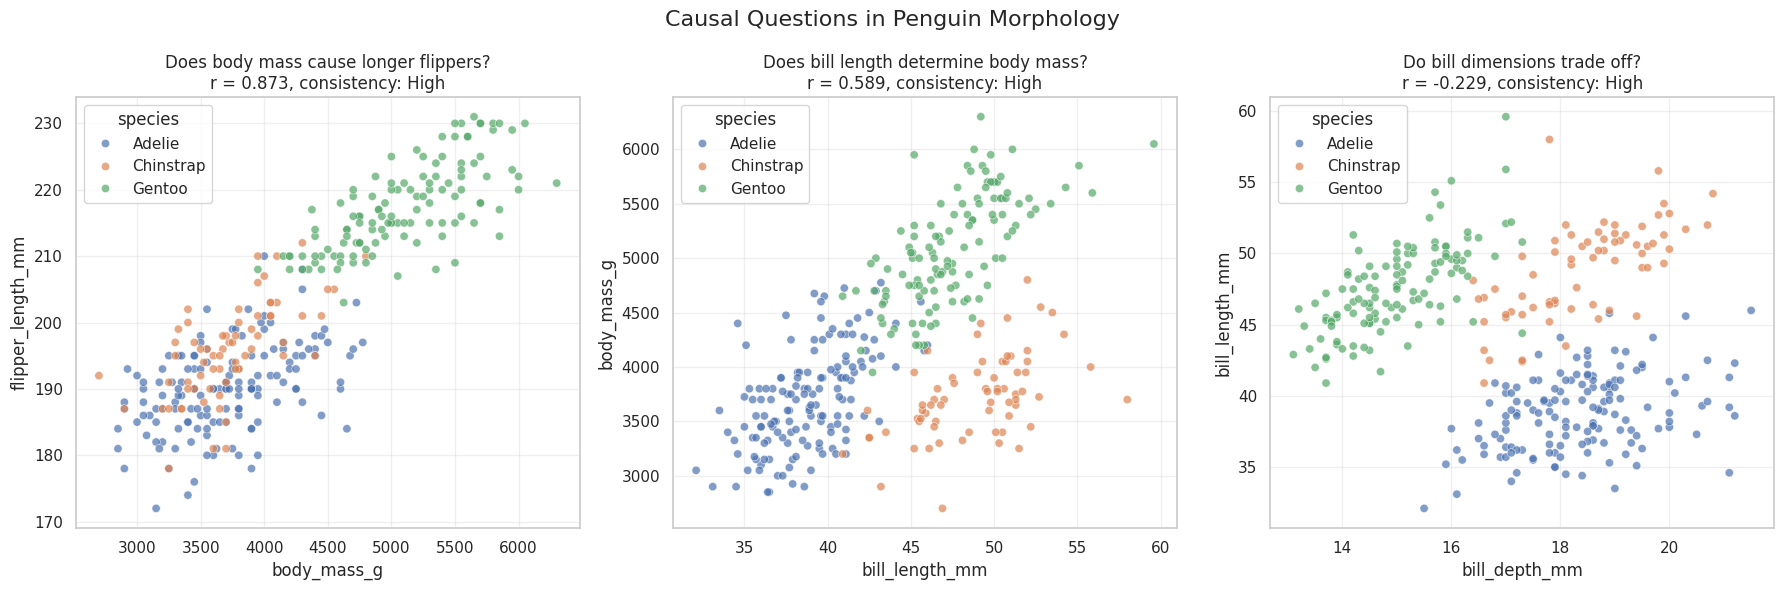

In [ ]:
# Load palmer penguin dataset from online source
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"

penguins = pd.read_csv(url)

# Check for missing values
print("\nMissing values per column:")
missing_counts = penguins.isnull().sum()


# Remove rows with missing values for correlation analysis
penguins_clean = penguins.dropna()

# Define continuous variables for correlation analysis
continuous_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_vars = ['species', 'island', 'sex']


def analyze_penguin_causation_scenarios(data, continuous_vars):
    """
    Analyze potential causal relationships in penguin data.
    """
    print("\n" + "=" * 50)
    print("CAUSAL THINKING: PENGUIN MORPHOLOGY")
    print("=" * 50)

    scenarios = [
        {
            'question': "Does body mass cause longer flippers?",
            'x': 'body_mass_g',
            'y': 'flipper_length_mm',
            'reasoning': 'Heavier penguins need longer flippers for swimming'
        },
        {
            'question': "Does bill length determine body mass?",
            'x': 'bill_length_mm',
            'y': 'body_mass_g',
            'reasoning': 'Larger penguins have proportionally longer bills'
        },
        {
            'question': "Do bill dimensions trade off?",
            'x': 'bill_depth_mm',
            'y': 'bill_length_mm',
            'reasoning': 'Bills shaped by feeding ecology constraints'
        }
    ]

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Causal Questions in Penguin Morphology', fontsize=16)

    for i, scenario in enumerate(scenarios):
        x_var, y_var = scenario['x'], scenario['y']

        # Calculate correlation
        clean_data = data[[x_var, y_var]].dropna()
        r, p = pearsonr(clean_data[x_var], clean_data[y_var])

        print(f"\n{scenario['question']}")
        print(f"Correlation: r = {r:.3f} (p = {p:.4f})")
        print(f"Reasoning: {scenario['reasoning']}")

        # Check consistency across species
        species_correlations = []
        for species in data['species'].unique():
            species_data = data[data['species'] == species][[x_var, y_var]].dropna()
            if len(species_data) > 10:
                r_species, _ = pearsonr(species_data[x_var], species_data[y_var])
                species_correlations.append(r_species)

        consistency = "High" if np.std(species_correlations) < 0.2 else "Low"
        print(f"Consistency across species: {consistency}")

        # Visualize
        sns.scatterplot(data=data, x=x_var, y=y_var, hue='species', ax=axes[i], alpha=0.7)
        axes[i].set_title(f'{scenario["question"]}\nr = {r:.3f}, consistency: {consistency}')
        axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# Step 3: Penguin causation analysis
penguin_causation = analyze_penguin_causation_scenarios(penguins_clean, continuous_vars)



### Question 1: Does body mass cause longer flippers?
- **Correlation**: r = 0.873 (very strong)
- **Consistency across species**: High
- **Biological reasoning**: Heavier penguins need longer flippers for swimming efficiency
- **Causal assessment**: Strong evidence for causal relationship
- **Why it's likely causal**: Physical constraints of swimming mechanics

### Question 2: Does bill length determine body mass?
- **Correlation**: r = 0.589 (moderate-strong)  
- **Consistency across species**: High
- **Biological reasoning**: Larger penguins have proportionally longer bills
- **Causal assessment**: Likely reflects overall body size scaling
- **Alternative explanation**: Both determined by species and developmental factors

### Question 3: Do bill dimensions trade off?
- **Correlation**: r = -0.229 (small negative)
- **Consistency across species**: High
- **Biological reasoning**: Bills shaped by feeding ecology constraints
- **Causal assessment**: Weak evidence - likely reflects species-level adaptations
- **Key insight**: The negative correlation likely reflects different feeding strategies between species

---

## Key Patterns in the Results

### What the Visualizations Reveal


**Penguin Morphology Plots**:
- Species clustering is visible in all three relationships
- The body mass-flipper length relationship shows the strongest, most consistent pattern
- Bill dimension relationships show more scatter, suggesting weaker causal links

### Consistency Across Species: A Causal Indicator

All three penguin relationships showed "High" consistency across species, meaning:
- Adelie, Chinstrap, and Gentoo penguins all show similar correlation patterns
- This strengthens the evidence for genuine biological relationships (not just statistical artifacts)
- Consistency is one of the Bradford Hill criteria for causal inference

---

## Bradford Hill Criteria Applied

### Strong Evidence for Causation (Body Mass → Flipper Length):
 **Temporal sequence**: Body mass and flipper growth occur together during development  
 **Strength**: Very strong correlation (r = 0.873)  
 **Consistency**: High across all species  
 **Biological plausibility**: Swimming mechanics require this relationship  
 **Coherence**: Fits with biomechanical principles  

### Weaker Evidence (Bill Dimensions):
 **Strength**: Weaker correlations  
 **Temporal sequence**: Both develop simultaneously  
 **Experimental evidence**: Would require manipulation studies  

---

## Critical Takeaways

### Why This Matters for Research

**In Observational Studies**:
- Strong correlations (like r = 0.909 for ice cream/drowning) can be completely spurious
- Always ask: "What third variables might explain this relationship?"
- Consider alternative causal directions

**In Biological Research**:
- Morphological correlations often reflect:
  - **Functional constraints** (body mass → flipper length)
  - **Developmental programs** (coordinated growth)
  - **Species-level adaptations** (bill dimensions)

### Best Practices Demonstrated

1. **Visualize by groups**: Species coloring revealed important patterns
2. **Check consistency**: Similar patterns across subgroups strengthen causal claims  
3. **Consider mechanisms**: Physical/biological plausibility matters
4. **Use multiple criteria**: No single test proves causation

### The Correlation-Causation Spectrum

**Strongest Causal Evidence**: Body mass ↔ Flipper length
- Physical necessity, high consistency, strong correlation

**Moderate Evidence**: Bill length ↔ Body mass  
- Developmental coordination, but multiple possible mechanisms

**Weakest Evidence**: Random variable correlations
- No mechanism, pure coincidence despite strong correlation

---



There is no single formal statistical test that can definitively prove causation the way we test for correlation (like with Pearson’s r and p-values).

**What We Can Test (Statistically):**
- Correlation tests: Pearson, Spearman, Kendall, etc. — measure strength and direction of association.

- Regression models: Predict effect of one variable on another, but without causal guarantees.

- Statistical control: Add covariates to regressions to reduce confounding — still not proof of causation.

- Randomized Controlled Trials (RCTs): Gold standard to demonstrate causation — involves actual manipulation of variables.

**What Helps Infer Causation (but not prove it outright):**
- Bradford Hill criteria (e.g., strength, plausibility, consistency, temporality).

- Longitudinal data: Helps with temporality (cause comes before effect).

- Natural experiments: Nature assigns treatment (e.g., policy changes), and we analyze the impact.

- Causal diagrams (e.g., DAGs): Used to visually represent and reason about causal structures.


**TL;DR Summary:**
You can test for correlation, but causation requires reasoning, design, or assumptions beyond what standard statistical tests alone can provide.